Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself. We will NOT grade this submissing w/o all the information<br>
<b>Name</b>:<br>
<b>NetID</b>:<br>
<b>Recitation (01,02)</b>:<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:      


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

## CS 439 - Introduction to Data Science
### Fall 2022

# Lab 3: Exploratary Data Analysis

### Due Date: Sunday October 23, 2022 by 11:59 PM ###
#### 60 points ####

### Instructions
This lab is presented as a notebook. Please execute the cells that are already completed and your task is to fill in the code
between ### START SOLUTION ### and ### END_OF SOLUTION ###. 

#### Important: Please do not add any new cells or change the order of cells. If you have questions, please contact the courseS staff.

In this lab, you will be working with a dataset from NYPD containing data on calls to the New York Police Department. Information about the datasets can be found at https://opendata.cityofnewyork.us/

## Setup

Note that after activating matplotlib to display figures inline via the IPython magic `%matplotlib inline`, we configure a custom default figure size. Virtually every default aspect of matplotlib [can be customized](https://matplotlib.org/users/customizing.html).

In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

# Part 1 : Getting Data (15 pts)

We will work with the NYPD Historic complaint data set. Our first task is to estimate the size of this download by looking at the number of rows, columns and using an estimated size for a column (use a reasonable value). The site metadata is available from the page
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [3]:
### START SOLUTION
#estimated size of the download (based on metadata information from the site) =       
# please explain how you reached the answer
### END_OF SOLUTION

### 1.1 Download the data
This file is large (use the estimate you did above). If it takes too long to download, you may want to interrupt and download the file using a browser and URL https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [4]:
import utils
data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = 'NYPD_Complaint_Data_Historic.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
dest_path = /* complete code here */
print(f'Located at {dest_path}')

Using version already downloaded: Thu Oct 13 04:19:40 2022
MD5 hash of file: 8c9551b1fe928af2034e5a6958822615
Located at data/NYPD_Complaint_Data_Historic.csv


### 1.2 Inspect the size of the file
It is helpful to get an idea of the size of the file. This can be done using functions in the utils library.

In [5]:
# look at the size of the file w/o opening it using OS (https://docs.python.org/3/library/os.html). You can perform
# variety of operating system related functions from this package.
import os
### START SOLUTION


### END_OF SOLUTION

2253930564


### 1.3 Split the large file
This data file NYPD_Complaint_Data_Historic.csv is too big to load into a single DataFrame. Let us split the large file into smaller files.  Let us find out the number of lines in the NYPD_Complaint_Data_Historic.csv file using utils.

In [6]:
# Using utils library, find the number of lines in the file

### START SOLUTION


### END_OF SOLUTION

7025835


In [7]:
# Split the file into 10 smaller files. Estimate the number of lines in each file using the count above
# files should be created in the data folder and named NYPD_Complaint_Data_Historic_1.csv, 
# NYPD_Complaint_Data_Historic_2.csv, ... NYPD_Complaint_Data_Historic_10.csv etc
# It is possible that few lines from the original file may not be saved due to rounding errors.

### START SOLUTION



### END_OF SOLUTION

/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


702584
702584
702584
702584
702584
702584


/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


702584
702584
702584
702584
5


### 1.4 Check the files in the data folder
Now, we'll use a method of the `Pathlib.Path` class called `glob` to list all files in the `data` directory. You will find useful information in pathlib [docs](https://docs.python.org/3/library/pathlib.html).

Below, we use pathlib's `glob` method to store the list of all files' names from the `data_dir` directory in the variable `file_names`. These names should be strings that contain only the file name (e.g. `dummy.txt` not `data/dummy.txt`). The asterisk (*) character is used with the `glob` method to match any string.

In [8]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

['NYPD_Complaint_Data_Historic_9.csv',
 'NYPD_Complaint_Data_Historic_10.csv',
 'NYPD_Complaint_Data_Historic_7.csv',
 'NYPD_Complaint_Data_Historic_6.csv',
 'NYPD_Complaint_Data_Historic_1.csv',
 'NYPD_Complaint_Data_Historic_8.csv',
 'NYPD_Complaint_Data_Historic_11.csv',
 'NYPD_Complaint_Data_Historic_2.csv',
 'NYPD_Complaint_Data_Historic_5.csv',
 'NYPD_Complaint_Data_Historic_12.csv',
 'NYPD_Complaint_Data_Historic_15.csv',
 'NYPD_Complaint_Data_Historic.csv',
 'NYPD_Complaint_Data_Historic_14.csv',
 'NYPD_Complaint_Data_Historic_13.csv',
 'NYPD_Complaint_Data_Historic_4.csv',
 'NYPD_Complaint_Data_Historic_3.csv',
 'NYPD_Complaint_Data_Historic_USE_THIS.csv']

### 1.5 Pre-processing of data
It is good to pre-process the data to see if the file can be opened in a Jupyter notebook. We need to avoid large files that can crash notebooks. Typically, files of size around 200 MB is ok to open into a DataFrame. In the following activities we will inspect the file w/o opening it as a DataFrame. Using utils.head 

In [9]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
head('data/NYPD_Complaint_Data_Historic.csv')
allDF = pd.read_csv("data/NYPD_Complaint_Data_Historic.csv")


/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 1.6 Inspecting and describing data columns
There should be 35 columns in each record. Using header information and data types, describe the type of data in each
column. If you are unable to determine, just state so.
##### START SOLUTION with all data columns
* CMPLNT_NUM : 
* CMPLNT_FR_DT: 
* CMPLNT_FR_TM:
* CMPLNT_TO_DT:
* CMPLNT_TO:
* ....
* VIC_RACE:
* VIC_SEX:
##### END_OF SOLUTION

# Part 2 - Exploratory Data Analysis  (20 points)
Exploratory data analysis (EDA) is the process of examining a subest of a large data set to see what we can know about the data. First we will explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 2.1 Time to load data into a DataFrame
Load the first CSV file, NYPD_Complaint_Data_Historic_1.csv into a `pandas.DataFrame` object. Also do a time analysis to see how long it took to load the data into a DataFrame. Time should be printed in seconds. The time libraries https://docs.python.org/3/library/time.html can help.

In [10]:
### START SOLUTION
import pandas as pd
calls = pd.read_csv("data/ NYPD_Complaint_Data_Historic_1.csv")
calls.head()


### END_OF SOLUTION

/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


3.1833410263061523


### 2.2 Description of Fields
Let's also check some basic information about these files using the `DataFrame.describe` and `DataFrame.info` methods. Describe columns that can be removed based on the information.

In [11]:
### START SOLUTION
calls.info()
calls.describe()

# What columns can be removed from the DataFrame? A reasonable rule of thumb is that if a column is missing more than 
# 50% of the data then it should be removed

### END_OF SOLUTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702583 entries, 0 to 702582
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         702583 non-null  int64  
 1   CMPLNT_NUM         702583 non-null  int64  
 2   CMPLNT_FR_DT       702571 non-null  object 
 3   CMPLNT_FR_TM       702583 non-null  object 
 4   CMPLNT_TO_DT       578811 non-null  object 
 5   CMPLNT_TO_TM       579129 non-null  object 
 6   ADDR_PCT_CD        702563 non-null  float64
 7   RPT_DT             702583 non-null  object 
 8   KY_CD              702583 non-null  int64  
 9   OFNS_DESC          701715 non-null  object 
 10  PD_CD              702238 non-null  float64
 11  PD_DESC            702238 non-null  object 
 12  CRM_ATPT_CPTD_CD   702583 non-null  object 
 13  LAW_CAT_CD         702583 non-null  object 
 14  BORO_NM            702210 non-null  object 
 15  LOC_OF_OCCUR_DESC  564356 non-null  object 
 16  PR

### 2.2 Finding Uniques

Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further.

find the number of unique values in each DataFrame column and answer the questions below.

In [12]:
### START SOLUTION
calls.nunique()

# Questions
# 1. How many distinct locations where the complaints have come from? 
# 2. How many age groups are represented in the data set? 
# 3. How many boroughs are included in the data set? 
# 4. How many offense types are listed in this data set? 

### END_OF SOLUTION

Unnamed: 0           702583
CMPLNT_NUM           702534
CMPLNT_FR_DT           5287
CMPLNT_FR_TM           1440
CMPLNT_TO_DT           4956
CMPLNT_TO_TM           1441
ADDR_PCT_CD              77
RPT_DT                 4945
KY_CD                    70
OFNS_DESC                64
PD_CD                   385
PD_DESC                 375
CRM_ATPT_CPTD_CD          2
LAW_CAT_CD                3
BORO_NM                   5
LOC_OF_OCCUR_DESC         5
PREM_TYP_DESC            73
JURIS_DESC               21
JURISDICTION_CODE        21
PARKS_NM                726
HADEVELOPT              265
HOUSING_PSA             906
X_COORD_CD            54359
Y_COORD_CD            57638
SUSP_AGE_GROUP           27
SUSP_RACE                 7
SUSP_SEX                  3
TRANSIT_DISTRICT         12
Latitude             130306
Longitude            127942
Lat_Lon               81536
PATROL_BORO               8
STATION_NAME            370
VIC_AGE_GROUP            33
VIC_RACE                  7
VIC_SEX             

### 2.3 Offense by Boro
Using GroupBy operation, create a DataFrame that groups offenses by Boro. call the DataFrame calls_by_Boro_and_offense

In [13]:
# YOUR CODE HERE
raise NotImplementedError()

{'BRONX': [1, 7, 9, 11, 16, 21, 23, 24, 31, 37, 46, 55, 62, 63, 68, 72, 75, 76, 77, 82, 83, 85, 87, 91, 93, 102, 107, 113, 121, 124, 131, 134, 135, 141, 142, 150, 154, 161, 164, 167, 172, 175, 196, 202, 203, 204, 209, 211, 212, 218, 227, 232, 245, 254, 266, 270, 290, 291, 300, 302, 316, 319, 321, 323, 328, 329, 338, 348, 355, 362, 367, 368, 371, 373, 374, 378, 384, 385, 390, 394, 396, 399, 400, 415, 420, 429, 433, 434, 437, 440, 444, 445, 448, 449, 453, 455, 463, 466, 468, 476, ...], 'BROOKLYN': [2, 8, 15, 18, 26, 28, 29, 30, 35, 40, 41, 43, 49, 51, 54, 56, 57, 60, 64, 67, 70, 78, 80, 86, 92, 100, 105, 111, 112, 120, 123, 126, 127, 133, 139, 144, 148, 157, 158, 162, 166, 169, 170, 174, 178, 179, 181, 182, 185, 188, 189, 190, 192, 193, 198, 200, 208, 220, 221, 222, 224, 228, 229, 231, 235, 237, 246, 247, 249, 258, 259, 261, 263, 264, 265, 267, 271, 272, 273, 274, 276, 277, 278, 279, 280, 281, 284, 287, 288, 293, 295, 301, 307, 312, 317, 322, 324, 332, 336, 344, ...], 'MANHATTAN': [0, 3,

### 2.4 Offenses in Bronx

In the cell below, find a list of strings corresponding to the possible values for `OFNS_DESC` when `BORO` is "BRONX". Create an expression that automatically extracts the names of the offenses.

In [14]:
# YOUR CODE HERE
raise NotImplementedError()

['PETIT LARCENY' 'CRIMINAL MISCHIEF & RELATED OF'
 'ASSAULT 3 & RELATED OFFENSES' 'ROBBERY' 'GRAND LARCENY'
 'OFF. AGNST PUB ORD SENSBLTY &' 'HARRASSMENT 2' 'BURGLARY'
 'DANGEROUS DRUGS' 'DANGEROUS WEAPONS' 'ARSON'
 'OFFENSES AGAINST PUBLIC ADMINI' 'GRAND LARCENY OF MOTOR VEHICLE'
 'FELONY ASSAULT' 'OFFENSES INVOLVING FRAUD' 'MISCELLANEOUS PENAL LAW'
 'VEHICLE AND TRAFFIC LAWS' 'CRIMINAL TRESPASS' 'SEX CRIMES' 'FORGERY'
 'POSSESSION OF STOLEN PROPERTY' 'DISORDERLY CONDUCT' 'RAPE'
 'ANTICIPATORY OFFENSES' 'ADMINISTRATIVE CODE' 'JOSTLING' 'FRAUDS'
 'INTOXICATED & IMPAIRED DRIVING' 'ALCOHOLIC BEVERAGE CONTROL LAW'
 'OFFENSES AGAINST THE PERSON' 'THEFT OF SERVICES'
 'OTHER OFFENSES RELATED TO THEF' 'THEFT-FRAUD'
 'NYS LAWS-UNCLASSIFIED FELONY' 'UNAUTHORIZED USE OF A VEHICLE'
 'FRAUDULENT ACCOSTING' 'PETIT LARCENY OF MOTOR VEHICLE'
 'CHILD ABANDONMENT/NON SUPPORT' nan 'OTHER STATE LAWS (NON PENAL LA'
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED' "BURGLAR'S TOOLS"
 'PROSTITUTION & RELATED OFFENSES

##### Question: How many offenses were committed in Bronx during the analysis period? Write the answer below.



In [15]:
# How many offenses were committed in Bronx during the analysis period? 


151944


### 2.5 Most Common Crimes in NYC

What are the five crime types of OFNS_DESC that have the most crime events in Bronx? You may need to use `value_counts` to find the answer. Save your results as a list of strings.

**Hint:** *The `keys` method of the Series class might be useful.*

In [16]:
# YOUR CODE HERE
raise NotImplementedError()

Index(['PETIT LARCENY', 'HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES',
       'CRIMINAL MISCHIEF & RELATED OF', 'DANGEROUS DRUGS'],
      dtype='object')


### 2.6 Probability of a Crime in Bronx
What is the probability that a the crime "Arson" can happen in Bronx?

In [17]:
### START SOLUTION

### END_OF SOLUTION

0.0023388807631998525

---
# Part 3: Visualizing the Data (20 pts)

## Pandas vs. Seaborn Plotting

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. However, the basic plots generated by pandas are not particularly pretty. While it's possible to manually use matplotlib commands to make pandas plots look better, we'll instead use a high level plotting library called Seaborn that will take care of most of this for us.

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful!

We will continue use EDA for examining a subest of a large data set to see what we can know about the data. Continue to explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 3.1 Plotting a Series
Using the built-in plotting functionality of pandas, such as `plot` method of the `Series` class to generate a `barh` plot type,  display the value counts for `OFNS_DESC` visually as a barh chart.

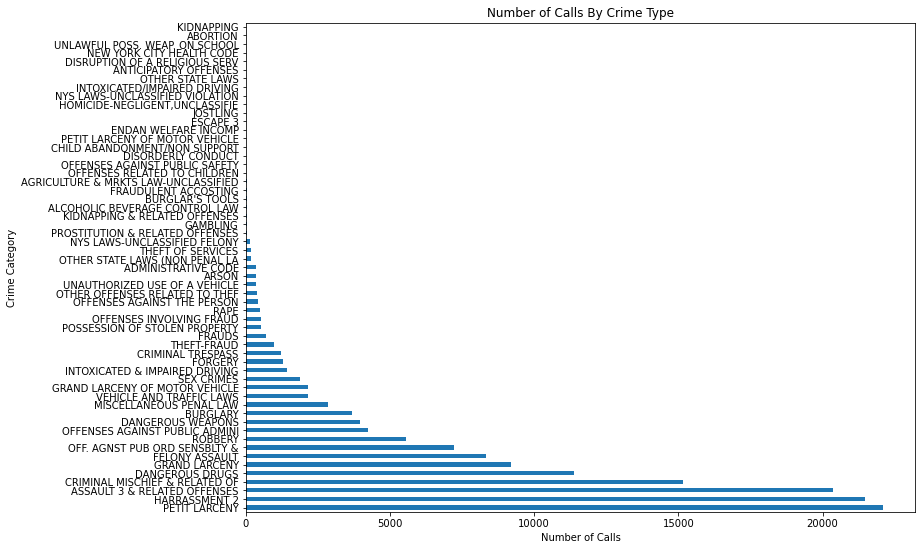

In [18]:
### START SOLUTION


### END_OF SOLUTION

### 3.2 Getting a Better Plot
The plot above can be messy as it plots all offenses. Plot only the offenses that has more than 10000 calls

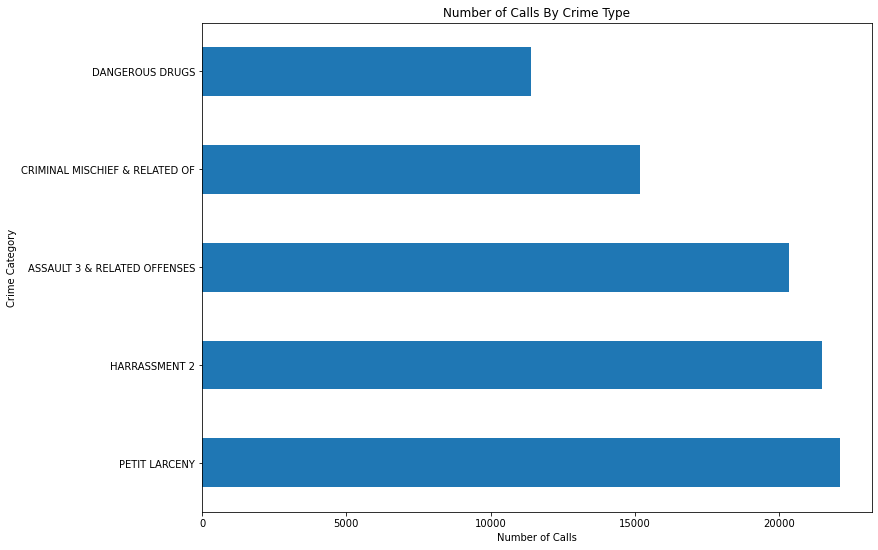

In [19]:
### START SOLUTION


### END_OF SOLUTION

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Use the y-label ("Crime Category"), x-label("Number of Calls") and title_of_plot("Number of Calls By Crime Type"

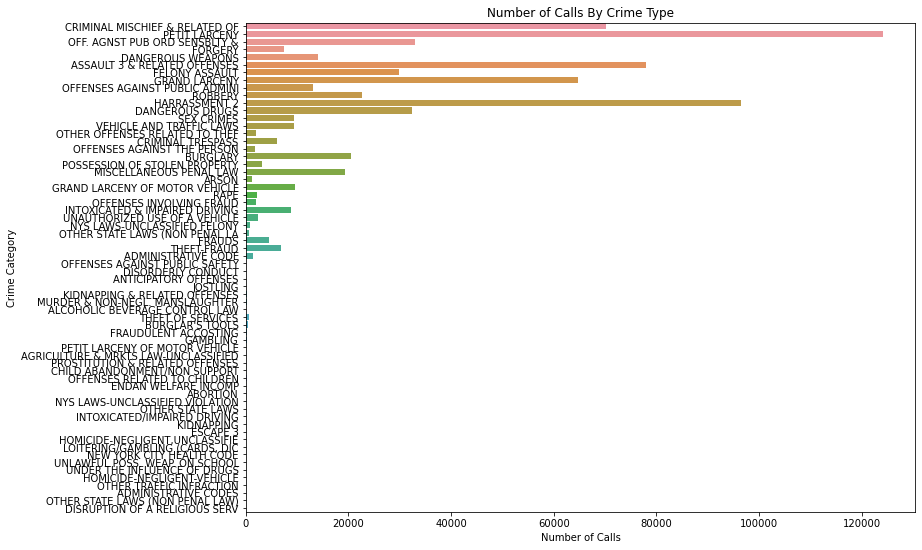

In [20]:
### START SOLUTION


### END_OF SOLUTION

You may note that the ordering might be different for the seaborn plot (as compared to pandas plot). If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, you can get the order you want.

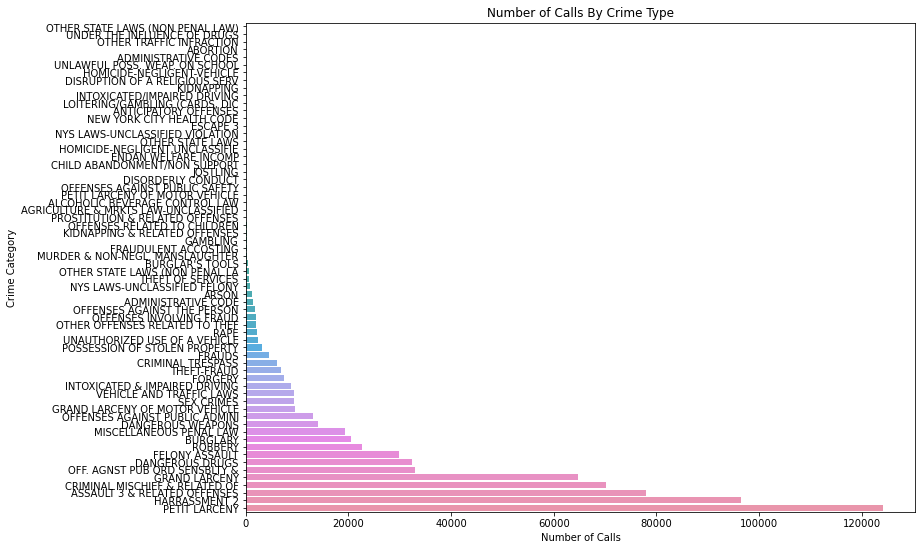

In [21]:
### START SOLUTION


### END_OF SOLUTION

Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.

## An Additional Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

### 3.3 making more plots

Now it is your turn to make some more plots using `pandas` and `seaborn`. Let's start by looking at the distribution of calls over days of the week.

The CMPLNT_FR_DT field contains the date of the event. We would like to add a new column to the DataFrame that includes Day of the week (DAY_OF_WEEK) that indicates the day of the week. This can help us analyze the crimes on a specific day of the week. For example, we can answer questions such as "what day of the week that a LARSON is likely to happen in NYC?"


Add a new column `DAY_OF_WEEK` into the `calls` dataframe that has the day string (eg. 'Sunday') for the corresponding value in CMPLNT_FR_DT. For example, if the first 3 values of `CMPLNT_FR_DT` are `['01/27/2006, '01/28/2006, '01/29/2006]`, then the first 3 values of the `DAY_OF_WEEK` column should be `["Friday", "Saturday", "Sunday"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["OFNS_DESC"]`.  Can you assign this to the new column `calls["DAY_OF_WEEK"]`?*

In [22]:
# YOUR CODE HERE
raise NotImplementedError()

### 3.4 Seaborn plots

Create a `seaborn` plot that shows the number of calls for each day of the week. You may want to use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 90 degrees.

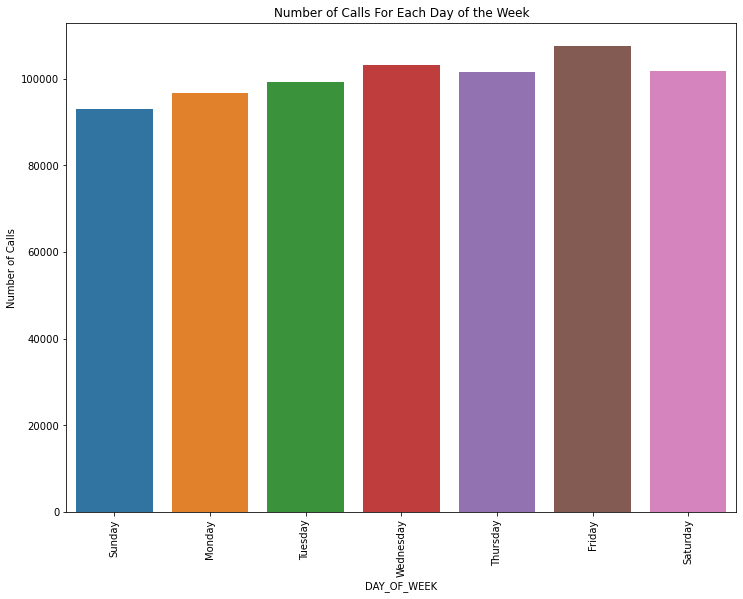

In [23]:
### START SOLUTION


### END_OF SOLUTION

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (eg. `Sunday`, `Monday`, ...). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

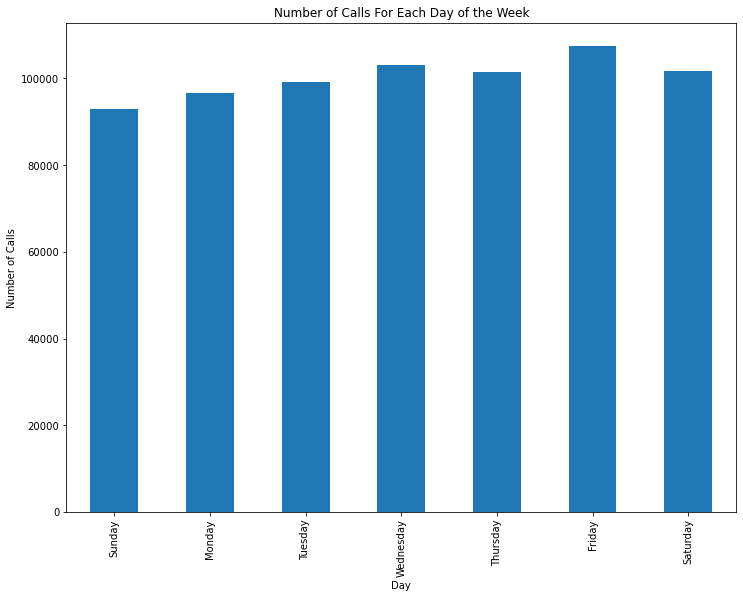

In [24]:
# YOUR CODE HERE
raise NotImplementedError()

### 3.5 What Day of the Week is more calls?

Is it true that weekdays generally have slightly more calls than Saturday or Sunday? What can you say about the difference?

##### START SOLUTION

##### END_OF SOLUTION

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the OFNS_DESC "HARRASSMENT 2". Which day is the peak for "HARRASSMENT 2"?

This time, use `seaborn` to create a vertical bar plot of the number of total noise violations reported on each day of the week, again ordered by the days of the week starting with Sunday. Do not use `pandas` to plot.

**Hint:** *If you're stuck, use the code for the seaborn plot in above question as a starting point.*

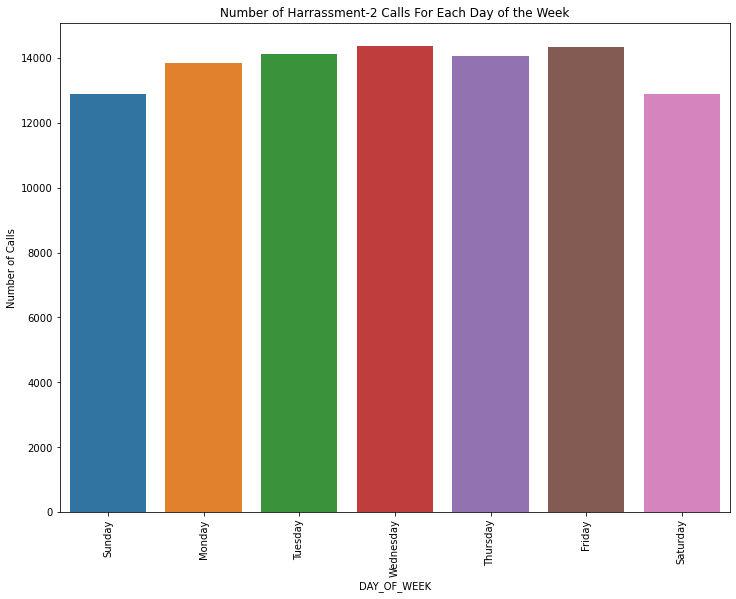

In [25]:
# YOUR CODE HERE
raise NotImplementedError()

### 3.6 Distribution

Do you see anything interesting about the distribution of HARRASSMENT 2 calls over a week? Type a short answer below.
##### START SOLUTION

##### END_OF SOLUTION

### 3.7 More Plots

Let's look at a similar distribution but for a crime we have much more calls data about. In the cell below, create the same plot as you did in previous questions, but now looking at instances of the OFNS_DESC "BURGLARY" (instead of "HARRASSMENT 2"). Use either `pandas` or `seaborn` plotting as you desire.

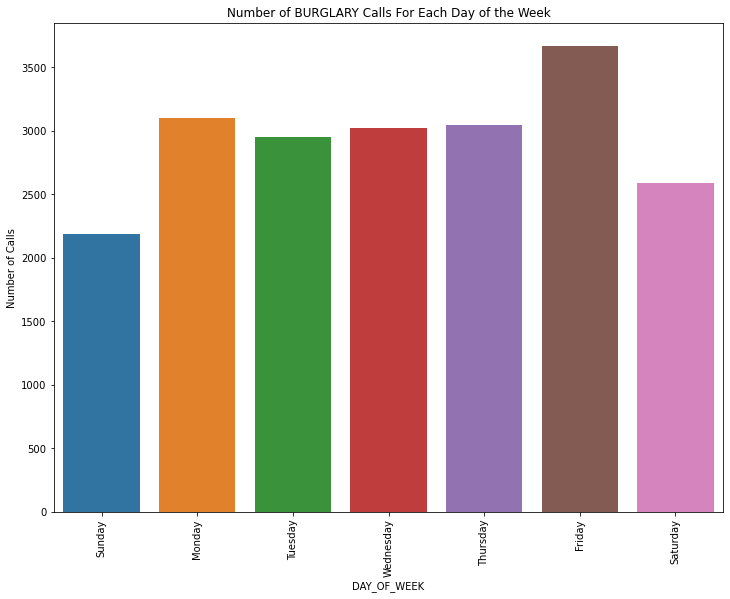

In [26]:
# YOUR CODE HERE
raise NotImplementedError()

### 3.8 time of events

Now let's look at the CMPLNT_TO_TM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`. Then plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).

You will want to look into how to use:

* [Series.str.slice](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.slice.html#pandas.Series.str.slice) to select the substring.
* [Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) to change the type.

**Hint:** *The `str` helper member of a series can be used to grab substrings.  For example, `calls["CMPLNT_TO_TM"].str.slice(3,5)` returns the minute of each hour of the `CMPLNT_TO_TM`.*

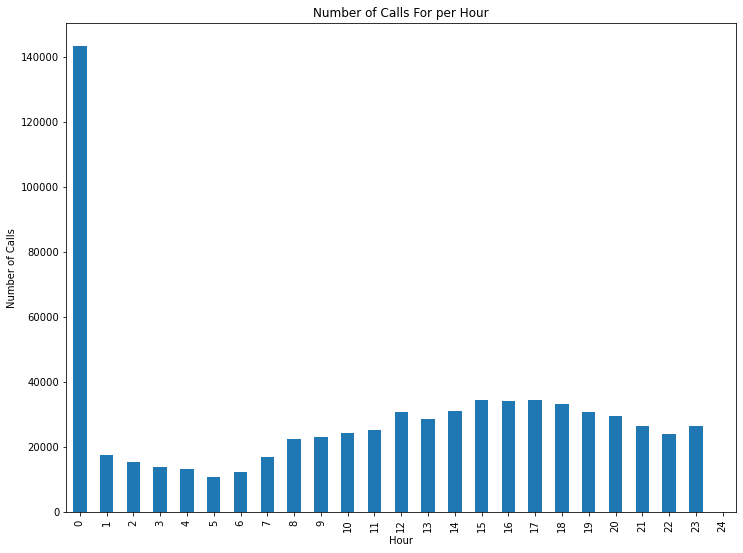

In [27]:
# YOUR CODE HERE
raise NotImplementedError()

# NOTE 0 is a replacement for NaN, you can remove it from the graph if you want.

Create a pandas bar plot showing the number of BURGLARY crimes committed at each hour of the day. Use the labels
* ax.set_xlabel("Hour of the Day")
* ax.set_ylabel("Number of Calls")
* ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

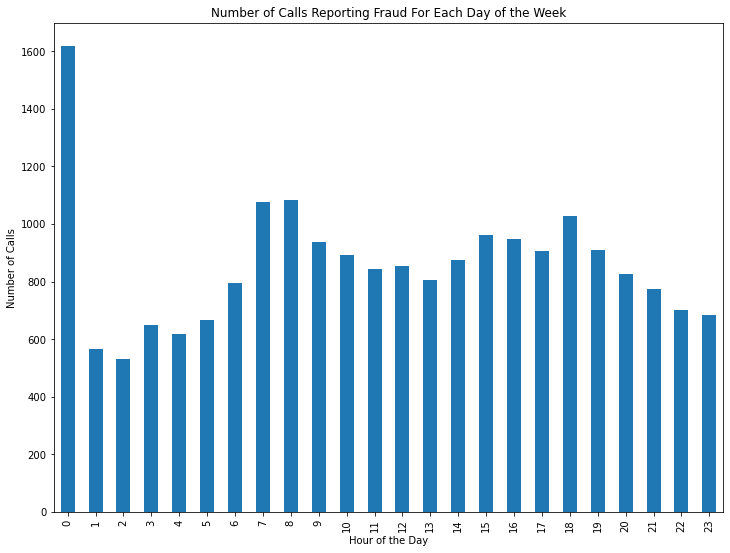

In [28]:
### START SOLUTION


### END_OF SOLUTION

# NOTE 0 is a replacement for NaN, you can remove it from the graph if you want.

### 3.9 More plots

In the cell below, create a seaborn plot of the same data. Again, make sure you provide axes labels and a title for your plot.

/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


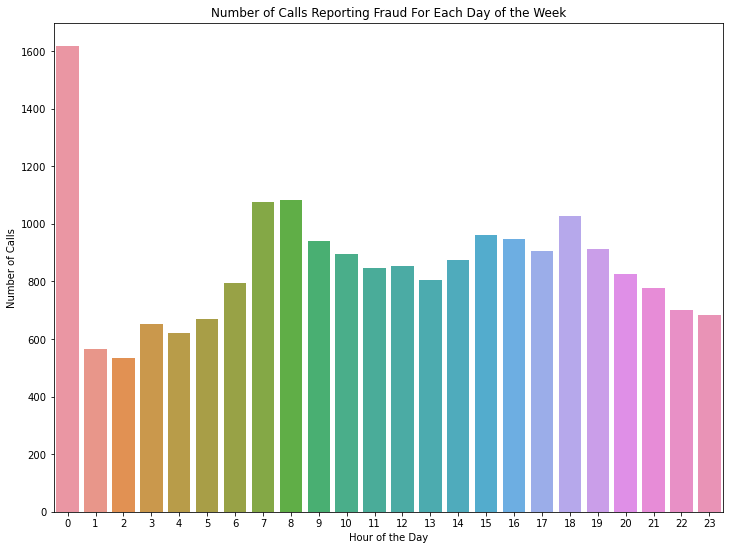

In [29]:
# YOUR CODE HERE
raise NotImplementedError()

# NOTE 0 is a replacement for NaN, you can remove it from the graph if you want.

### 3.10 Spike in burglary?

According to your plots, is there a spike in calls reporting BURGLARY at any particular time? If so, Do you trust that this spike is legitimate, or could there be an issue with our data? Explain your reasoning in 1-2 sentences below.

#### START SOLUTION


#### END_OF SOLUTION

In the cell below, we generate a boxplot which examines the hour of day of each crime broken down by the `OFNS_DESC` value.  To construct this plot we used the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

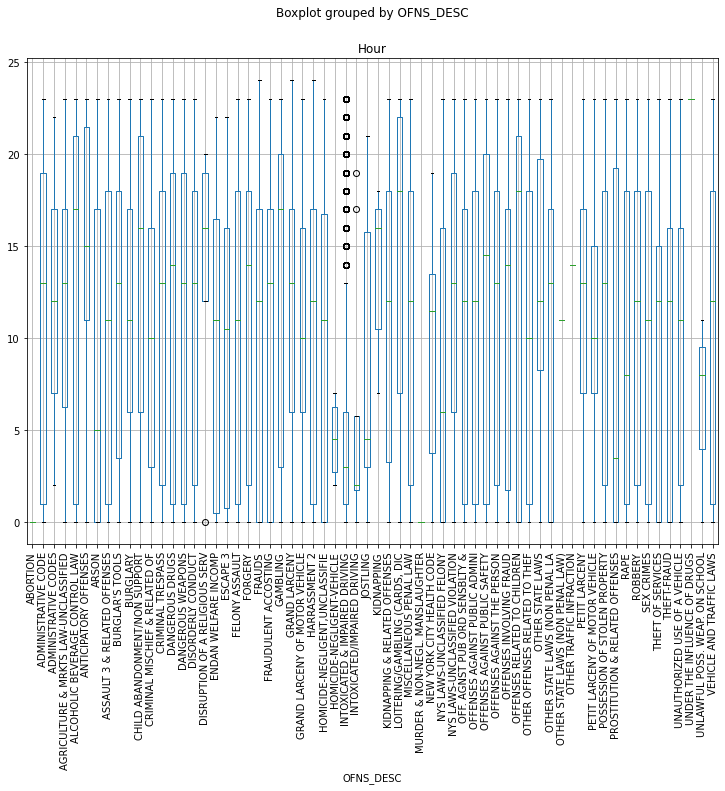

In [30]:
calls.boxplot(column="Hour", by='OFNS_DESC', rot=90);

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. See either the textbook (https://www.textbook.ds100.org/ch/06/viz_quantitative.html) or the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer` as a string.

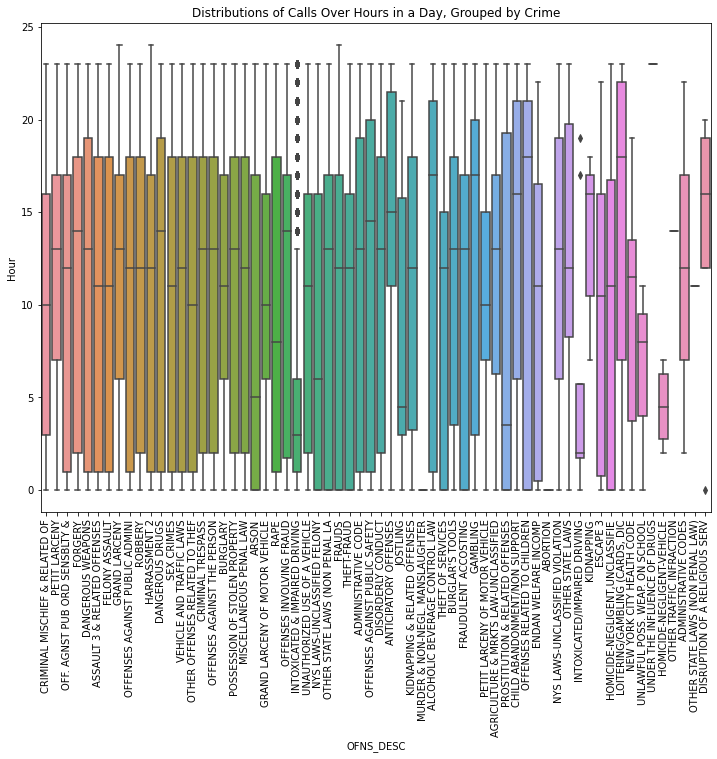

In [31]:
# YOUR CODE HERE
raise NotImplementedError()

### 3.11a Explore Suspect and Victim Age Relationships
In this activity we explore relations between SUSP_AGE_GROUP and VIC_AGE_GROUP
1. create a matrix of where rows are SUSP_AGE_GROUPS and Columns are VIC_AGE_GROUPs
2. Fill in the matrix with all probabilities (eg. "the probability that <18 susp_group target <18 victim_group). 

In [41]:
### START SOLUTION

### END_OF SOLUTION

VIC_AGE_GROUPs,-1,-2,-40,-51,-59,-65,-81,-936,-952,-966,...,18-24,25-44,45-64,65+,954,956,970,972,<18,UNKNOWN
SUSP_AGE_GROUPS,,,,,,,,,,,,,,,,,,,,,
-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-80,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-939,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
-941,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-969,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-972,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-974,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-978,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-979,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 3.11b Explore Suspect and Victim Sex Relationships
In this activity we explore relations between SUSP_SEX and VIC_SEX 
1. create a matrix of where rows are SUSP_SEX and Columns are VIC_SEX
2. Fill in the matrix with all probabilities (eg. "the probability that Males target other Males?")

In [42]:
### START SOLUTION

### END_OF SOLUTION

VIC_SEX,D,E,F,M
SUSP_SEX,,,,
F,0.121325,0.051417,0.534124,0.293134
M,0.124712,0.139885,0.429951,0.305452
U,0.114066,0.039665,0.379411,0.466857


### 3.11c Observations 
Based on what was calculated in 3.11a and 3.11b, state at least important observations.
##### START SOLUTION
Accept any observation about the data
##### END_OF SOLUTION

### 3.12 - Visualization of crimes on a Map of NYC
Finally we attempt to visualize the crimes committed in NYC on a Map. For this activity, use all data, not just the First set,  NYPD_Complaint_Data_Historic_1. 
First we need to install some mapping software. RSun the cell below to install folium package for mapping software.

In [34]:
!/koko/system/anaconda/envs/python39/bin/pip install --user folium

In [35]:
### Plot the maps for BURGLARY in NYC
### if it takes too much time or map does not show up, try plotting a subset of the data set of for a specific crime

### START SOLUTION


### END_OF SOLUTION

# Part 4: Kernel Density Estimators (KDE) (5 pts)
When compared with the commonly used histogram, the kernel density estimator shows several advantages.
1. It is a smooth curve and thus it better exhibits the details of the probability density function.
2. It uses all sample points' locations, so, therefore, it better reveal the information contained in the sample.

In this activity, we will use KDE on CMPLNT_FR_DT data column from NYPD data set. Work with the column labled CMPLNT_FR_DT. The goal is to plot this one dimensional time data using KDE to see the distribution of time in a density map. You may have to convert time objects seconds.

### 4.1 - Using Seaborn kdeplot, plot the KDE graph

<AxesSubplot:xlabel='CMPLNT_FR_DT', ylabel='Density'>

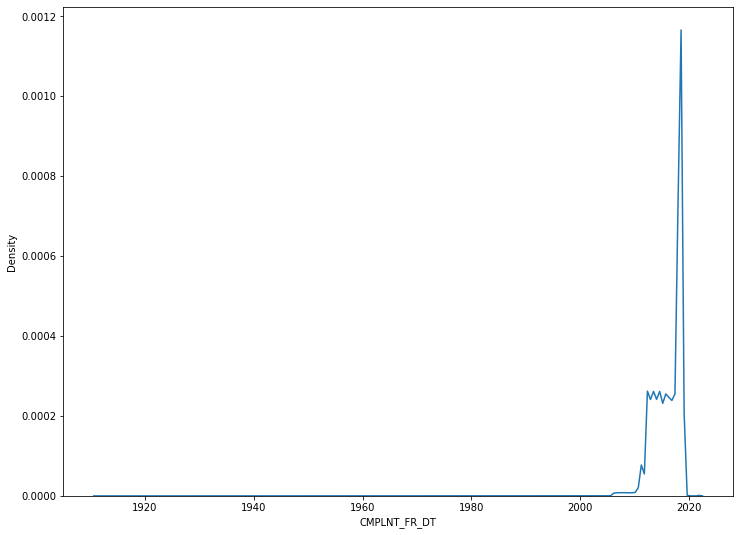

In [36]:
### START SOLUTION


### END_OF SOLUTION

### 4.2 - What can you deduce from the KDE plot? Write your responses here
##### START RESPONSE
Accept any response here

##### END_OF RESPONSE

### 4.3 (OPTIONAL - bonus - 5 pts) - Implement your own kernel function for KDE
Implement 3 Kernel functions from scratch from the following list.<br>
<img src='KDE.jpg' width="400" height="400"><br>
plot the KDE using your own code. Do not use kdeplot. Compare with Seaborn KDE plot. Do research to find out what kernel function that kdeplot is using and discuss advantages and disadvantages of each function compared to .

In [37]:
### START SOLUTION







### END_OF SOLUTION

<b> 4.3.1 </b> Plot the KDE using your own code. Do not use kdeplot. 

In [38]:
### START SOLUTION







### END_OF SOLUTION

Do your research to find what kernel function that kdeplot is using. Compare kdeplot density graph with your own.
### write your comments below
##### START RESPONSE


##### ENDOF RESPONSE

 ## Congratulations !!!

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> Output:</b> Please **remove all output** from your notebook prior to submission<br>
<b> File Name:</b> Please name the file as your_section_your_netID_Lab3.ipynb (eg. 01_adg133_Lab3.ipynb<br>
<b> Submit To: </b>CodeBench <br>
<b>Warning:</b> Failure to follow directions may result in loss of points.<br>
</div>

@2022 A.D. Gunawardena. Many people contributed to this lab including TA Liqin Long (now at Google). Credits go to Josh Hug, and Berkeley Data Science Group for their contributions to the original version. Please DO NOT share this lab and/or post them on public sites such as github and others.